In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import matplotlib
from glob import glob
import numpy as np

In [3]:
tests = glob("*.out")
tests = [i[:-4] for i in tests]
# sizes of tests
x = []
# dense ddpcm full time
y = []
# dense matvecs with r_eps
y_eps = []
# energy, cmputed by dense ddpcm
y_en = []
# fmm ddpcm full time
z = []
# fmm matvecs with r_eps
z_eps = []
# energy, computed by fmm pcm
z_en = []
# get data
for t in tests:
    with open(t+".inp") as fd:
        lines = fd.readlines()
    x.append(int(lines[0]))
    with open(t+".out") as fd:
        lines = fd.readlines()
    y_eps.append(float(lines[0].split()[-1]))
    y_en.append(float(lines[2].split()[-1]))
    y.append(float(lines[3].split()[-1]))
    with open(t+".fmm") as fd:
        lines = fd.readlines()
    z_eps.append(float(lines[0].split()[-1]))
    z_en.append(float(lines[2].split()[-1]))
    z.append(float(lines[3].split()[-1]))
#print(x)
order = np.argsort(x)
x = np.array(x)[order]
y = np.array(y)[order]
y_eps = np.array(y_eps)[order]
y_en = np.array(y_en)[order]
z = np.array(z)[order]
z_eps = np.array(z_eps)[order]
z_en = np.array(z_en)[order]

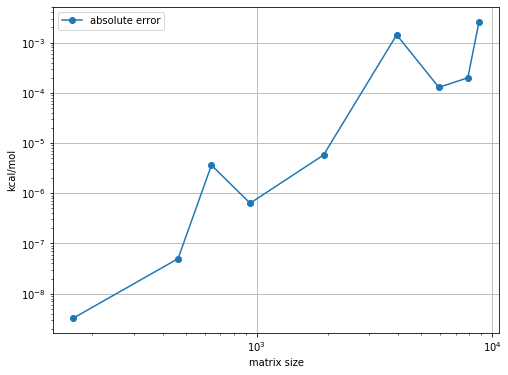

In [4]:
fig = plt.figure(figsize=(8,6))
plt.loglog(x, abs(y_en-z_en), label="absolute error", marker="o")
#plt.loglog(x, x**3/x[0]**3*y_eps[0], label="$O(N^3)$")
#plt.loglog(x, x**2*np.log(x)/x[0]**2/np.log(x[0])*z_eps[0], label="N^2 logN")
plt.legend()
plt.grid()
plt.xlabel("matrix size")
plt.ylabel("kcal/mol")
plt.savefig("diff_abs_energy.pdf")

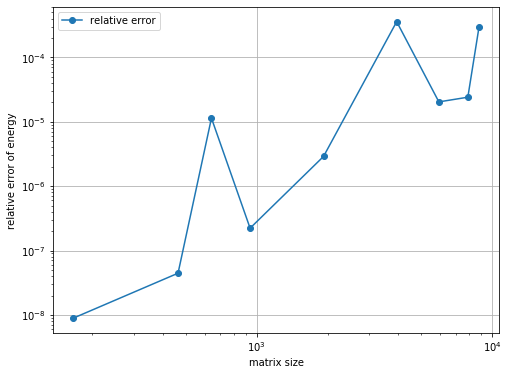

In [5]:
fig = plt.figure(figsize=(8,6))
plt.loglog(x, abs((y_en-z_en)/y_en), label="relative error", marker="o")
#plt.loglog(x, x**3/x[0]**3*y_eps[0], label="$O(N^3)$")
#plt.loglog(x, x**2*np.log(x)/x[0]**2/np.log(x[0])*z_eps[0], label="N^2 logN")
plt.legend()
plt.grid()
plt.xlabel("matrix size")
plt.ylabel("relative error of energy")
plt.savefig("diff_rel_energy.pdf")

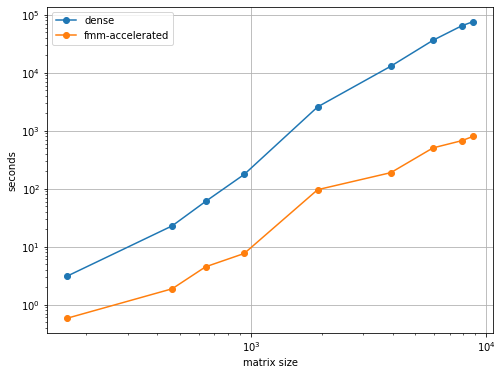

In [6]:
fig = plt.figure(figsize=(8,6))
plt.loglog(x, y_eps, label="dense", marker="o")
plt.loglog(x, z_eps, label="fmm-accelerated", marker="o")
#plt.loglog(x, x**3/x[0]**3*y_eps[0], label="$O(N^3)$")
#plt.loglog(x, x**2*np.log(x)/x[0]**2/np.log(x[0])*z_eps[0], label="N^2 logN")
plt.legend()
plt.grid()
plt.xlabel("matrix size")
plt.ylabel("seconds")
plt.savefig("diff_abs_time.pdf")

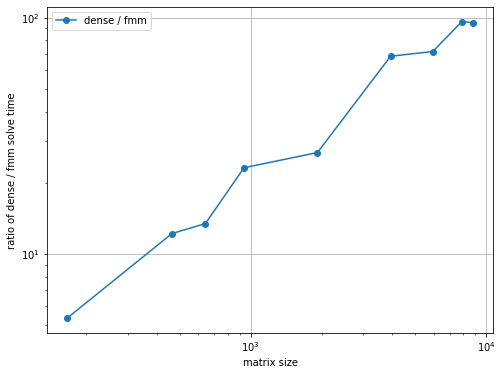

In [7]:
fig = plt.figure(figsize=(8,6))
plt.loglog(x, y_eps/z_eps, label="dense / fmm", marker="o")
#plt.loglog(x, 1.2*x/x[0]*y_eps[0]/z_eps[0], label="$O(N)$")
plt.xlabel("matrix size")
plt.ylabel("ratio of dense / fmm solve time")
plt.legend()
plt.grid()
plt.savefig("diff_rel_time.pdf")

In [8]:
folder = "sas"
tests = glob(folder+"/*.inp")
tests = [i[:-4] for i in tests]
# sizes of tests
x = []
# Time for pcm solve
y_pcm_time = []
# Number of pcm solve iterations
y_pcm_iters = []
# Time for cosmo solve
y_cosmo_time = []
# Number of cosmo solve iterations
y_cosmo_iters = []
# energy, computed by ddpcm_fmm
y_en = []
# ddpcm_fmm full time
y_full_time = []
# get data
for t in tests:
    with open(t+".inp") as fd:
        lines = fd.readlines()
    x.append(int(lines[0]))
    with open(t+".fmm") as fd:
        lines = fd.readlines()
    y_pcm_time.append(float(lines[0].split()[-1]))
    y_pcm_iters.append(int(lines[1].split()[-1]))
    y_cosmo_time.append(float(lines[2].split()[-1]))
    y_cosmo_iters.append(int(lines[3].split()[-1]))
    y_en.append(float(lines[4].split()[-1]))
    y_full_time.append(float(lines[5].split()[-1]))
#print(x)
order = np.argsort(x)
x = np.array(x)[order]
y_pcm_time = np.array(y_pcm_time)[order]
y_pcm_iters = np.array(y_pcm_iters)[order]
y_cosmo_time = np.array(y_cosmo_time)[order]
y_cosmo_iters = np.array(y_cosmo_iters)[order]
y_en = np.array(y_en)[order]
y_full_time = np.array(y_full_time)[order]

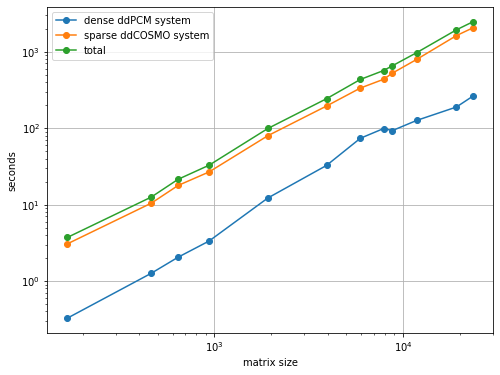

In [9]:
fig = plt.figure(figsize=(8,6))
plt.plot(x, y_pcm_time, label="dense ddPCM system", marker="o")
plt.plot(x, y_cosmo_time, label="sparse ddCOSMO system", marker="o")
plt.plot(x, y_full_time, label="total", marker="o")
plt.xscale('log')
plt.yscale('log')
plt.xlabel("matrix size")
plt.ylabel("seconds")
#plt.xticks([x[0], x[5], x[7], x[9], x[10], x[11]])
plt.legend()
plt.grid()
plt.savefig(folder+"/ddpcm_fmm_time.pdf")

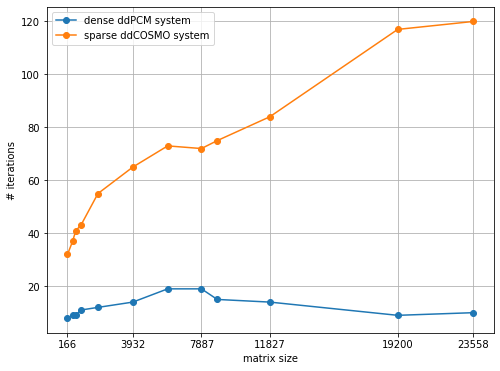

In [10]:
fig = plt.figure(figsize=(8,6))
plt.plot(x, y_pcm_iters, label="dense ddPCM system", marker="o")
plt.plot(x, y_cosmo_iters, label="sparse ddCOSMO system", marker="o")
#plt.plot(x, x*y_pcm_iters[0]/x[0], label="linear scaling")
plt.xlabel("matrix size")
plt.ylabel("# iterations")
#plt.xticks([x[0], x[5], x[7], x[9], x[12], x[13]])
plt.xticks([x[0], x[5], x[7], x[9], x[10], x[11]])
plt.legend()
plt.grid()
plt.savefig(folder+"/ddpcm_fmm_iters.pdf")

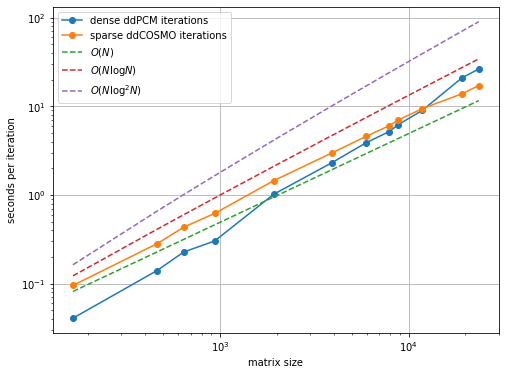

In [14]:
fig = plt.figure(figsize=(8,6))
plt.loglog(x, y_pcm_time/y_pcm_iters, label="dense ddPCM iterations", marker="o")
plt.loglog(x, y_cosmo_time/y_cosmo_iters, label="sparse ddCOSMO iterations", marker="o")
plt.loglog(x, x/x[0]*y_pcm_time[0]/y_pcm_iters[0]*2, label="$O(N)$", linestyle="--")
plt.loglog(x, x*np.log(x)/x[0]/np.log(x[0])*y_pcm_time[0]/y_pcm_iters[0]*3, label="$O(N \log{N})$",
           linestyle="--")
plt.loglog(x, x*np.log(x)**2/x[0]/np.log(x[0])**2*y_pcm_time[0]/y_pcm_iters[0]*4, label="$O(N \log^2{N})$",
           linestyle="--")
plt.xlabel("matrix size")
plt.ylabel("seconds per iteration")
plt.legend()
plt.grid()
plt.savefig(folder+"/ddpcm_fmm_time_iter.pdf")